In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import tweepy
import matplotlib.pyplot as plt
import sys
import requests
import json
sys.path.append("../src/data/")
from collect_hoaxy import HoaxyApi
sys.path.append("../src/features/")
from graph_embed import GraphEmbed

In [2]:
claims = pd.read_pickle("../data/external/combined_claims.pkl")
keywords = pd.read_csv("../data/external/all_keywords.csv")
organizations = pd.read_csv("../data/external/all_organisations.csv")
iffy_list = pd.read_csv("../data/external/iffy+.csv")

In [8]:
organization_list = organizations.name.to_list()

In [16]:
cross_list = iffy_list.loc[iffy_list.Name.isin(organization_list) | iffy_list.Domain.isin(organization_list)]
cross_list

,Domain,MBFC,MBFC factual,BF,FC,PF,WI,Site Rank,Yr online,Name,Media Bias/Fact Check page,Wikipedia article,HTTP,URL,lang,hflag,iffy,Lists
13,activistpost.com,CP,L,NaN,NaN,NaN,NaN,65871,NaN,Activist Post,https://mediabiasfactcheck.com/activist-post/,NaN,200.0,https://www.activistpost.com/,en,NaN,1.0,1.0
92,breitbart.com,FN,M,NaN,NaN,NaN,NaN,311,1999.0,Breitbart,https://mediabiasfactcheck.com/breitbart/,https://en.wikipedia.org/wiki/Breitbart_News,200.0,https://breitbart.com/,en,NaN,NaN,1.0
262,friatider.se,FN,L,NaN,NaN,NaN,NaN,146672,2009.0,Fria Tider,https://mediabiasfactcheck.com/fria-tider-free...,NaN,200.0,https://www.friatider.se/,sv,1.0,1.0,1.0
363,infowars.com,CP,VL,NaN,1.0,NaN,1.0,4158,1999.0,Infowars,https://mediabiasfactcheck.com/infowars-alex-j...,https://en.wikipedia.org/wiki/InfoWars,200.0,https://www.infowars.com/,en,NaN,1.0,3.0
529,pravdareport.com,FN,VL,NaN,NaN,NaN,NaN,95427,2015.0,Pravda Report,https://mediabiasfactcheck.com/pravda-report/,https://en.wikipedia.org/wiki/Pravda,200.0,https://www.pravdareport.com/,en,NaN,1.0,1.0
536,prisonplanet.com,CP,VL,NaN,NaN,NaN,NaN,62113,2001.0,Prison Planet,https://mediabiasfactcheck.com/prison-planet/,https://en.wikipedia.org/wiki/Alex_Jones,200.0,https://www.prisonplanet.com/,en,NaN,1.0,1.0
583,rt.com,FN,VL,NaN,NaN,NaN,NaN,294,1991.0,RT News,https://mediabiasfactcheck.com/rt-news/,https://en.wikipedia.org/wiki/RT_(TV_network),200.0,https://www.rt.com/,en,NaN,1.0,1.0
612,southfront.org,CP,L,NaN,NaN,NaN,NaN,37014,2015.0,South Front,https://mediabiasfactcheck.com/south-front/,NaN,200.0,https://southfront.org/,en,NaN,1.0,1.0
614,sputniknews.com,FN,VL,NaN,NaN,NaN,NaN,630,2011.0,Sputnik,https://mediabiasfactcheck.com/sputnik-news/,https://en.wikipedia.org/wiki/Sputnik_(news_ag...,200.0,https://sputniknews.com/,en,NaN,1.0,1.0
627,strategic-culture.org,FN,VL,NaN,NaN,NaN,NaN,138978,NaN,Strategic Culture Foundation,https://mediabiasfactcheck.com/strategic-cultu...,NaN,200.0,https://www.strategic-culture.org/,en,NaN,1.0,1.0


In [15]:
len(cross_list)

16

## Testing out hoaxy api

In [16]:
all_networks = pd.read_csv("../data/raw/all_networks.csv")
all_networks.id.nunique()

1957

In [23]:
all_networks.domain.nunique()

73

In [4]:
g_embed = GraphEmbed()
graphs = g_embed.build_graphs(all_networks, 10)

In [5]:
len(graphs)

449

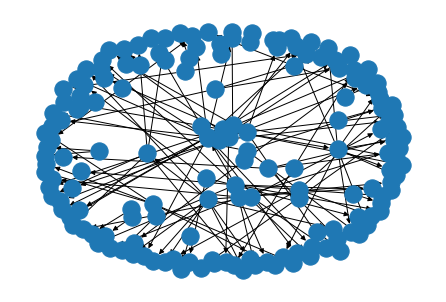

In [32]:
nx.draw(graphs[6])

## Trying to construct network myself

In [41]:
top_claim = tweets.claim.value_counts().keys()[0]
sample = tweets.loc[tweets.claim == top_claim]

In [77]:
sample.columns

Index(['claim', 'url', 'date', 'content', 'renderedContent', 'id',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'username', 'displayname',
       'description', 'rawDescription', 'descriptionUrls', 'verified',
       'created', 'followersCount', 'friendsCount', 'statusesCount',
       'favouritesCount', 'listedCount', 'mediaCount', 'location', 'protected',
       'linkUrl', 'linkTcourl', 'profileImageUrl', 'profileBannerUrl', 'label',
       'user_id'],
      dtype='object')

In [85]:
sample.loc[sample.retweetCount > 5].iloc[-1].url

'https://twitter.com/RT_com/status/1206134035338203136'

In [80]:
sample.loc[sample.mentionedUsers.notnull()]

,claim,url,date,content,renderedContent,id,replyCount,retweetCount,likeCount,quoteCount,...,listedCount,mediaCount,location,protected,linkUrl,linkTcourl,profileImageUrl,profileBannerUrl,label,user_id
179,OPCW has deliberately falsified Douma report t...,https://twitter.com/GordBolton/status/12065380...,2019-12-16 11:34:29+00:00,@CTVNews #uspoli #cdnpoli #pnpcbc #UKpolitics ...,@CTVNews #uspoli #cdnpoli #pnpcbc #UKpolitics ...,1206538079542005760,0.0,0.0,0.0,0.0,...,73.0,44416.0,NaN,False,NaN,NaN,https://pbs.twimg.com/profile_images/107872815...,https://pbs.twimg.com/profile_banners/22658856...,NaN,2265885618
203,OPCW has deliberately falsified Douma report t...,https://twitter.com/MuammarFidel/status/120629...,2019-12-15 19:46:15+00:00,@DerbyChrisW https://t.co/UDMFRu9jOT,@DerbyChrisW rt.com/news/475926-op…,1206299451377246208,0.0,0.0,0.0,0.0,...,0.0,10.0,NaN,False,NaN,NaN,https://pbs.twimg.com/profile_images/119691606...,NaN,NaN,1196914831636541440
213,OPCW has deliberately falsified Douma report t...,https://twitter.com/JohnDelacour/status/120626...,2019-12-15 17:18:36+00:00,#OPCW_FRAUD @OPCW \n#Douma_Hoax #SARIN_HOAX #S...,#OPCW_FRAUD @OPCW \n#Douma_Hoax #SARIN_HOAX #S...,1206262293056704512,2.0,1.0,4.0,0.0,...,97.0,14206.0,"Кронштадт, Санкт-Петербург",False,NaN,NaN,https://pbs.twimg.com/profile_images/939908688...,https://pbs.twimg.com/profile_banners/24622682...,NaN,2462268236
228,OPCW has deliberately falsified Douma report t...,https://twitter.com/friendofrussia/status/1206...,2019-12-15 15:23:48+00:00,@SulomeAnderson @bellingcat When the fingerpri...,@SulomeAnderson @bellingcat When the fingerpri...,1206233401453424640,0.0,0.0,2.0,0.0,...,7.0,213.0,United Kingdom,False,NaN,NaN,https://pbs.twimg.com/profile_images/142527726...,https://pbs.twimg.com/profile_banners/11331925...,NaN,1133192578247954432
229,OPCW has deliberately falsified Douma report t...,https://twitter.com/friendofrussia/status/1206...,2019-12-15 15:10:57+00:00,"@SenSanders ""Bashar Assad's chemical attack......","@SenSanders ""Bashar Assad's chemical attack......",1206230169884737536,0.0,0.0,0.0,0.0,...,7.0,213.0,United Kingdom,False,NaN,NaN,https://pbs.twimg.com/profile_images/142527726...,https://pbs.twimg.com/profile_banners/11331925...,NaN,1133192578247954432
238,OPCW has deliberately falsified Douma report t...,https://twitter.com/JamazingPal/status/1206185...,2019-12-15 12:15:09+00:00,"Hey @AIPAC, tell us who gave US intel report a...","Hey @AIPAC, tell us who gave US intel report a...",1206185927682543616,0.0,0.0,0.0,0.0,...,0.0,12.0,NaN,False,NaN,NaN,https://pbs.twimg.com/profile_images/117687703...,https://pbs.twimg.com/profile_banners/10670696...,NaN,1067069696636305408
246,OPCW has deliberately falsified Douma report t...,https://twitter.com/friendofrussia/status/1206...,2019-12-15 10:24:49+00:00,@whitehelmets90 https://t.co/9wnYWjJonX,@whitehelmets90 rt.com/news/475926-op…,1206158160148471808,0.0,0.0,0.0,0.0,...,7.0,213.0,United Kingdom,False,NaN,NaN,https://pbs.twimg.com/profile_images/142527726...,https://pbs.twimg.com/profile_banners/11331925...,NaN,1133192578247954432
253,OPCW has deliberately falsified Douma report t...,https://twitter.com/RT_com/status/120613403533...,2019-12-15 08:48:57+00:00,The team on the ground in #Douma was apparentl...,The team on the ground in #Douma was apparentl...,1206134035338203136,4.0,11.0,17.0,0.0,...,20749.0,184204.0,NaN,False,http://RT.com,https://t.co/gtHSJ8TMVD,https://pbs.twimg.com/profile_images/101883390...,https://pbs.twimg.com/profile_banners/64643056...,UserLabel(description='Russia state-affiliated...,64643056


In [76]:
sample.loc[sample.inReplyToUser.notnull()]

,claim,url,date,content,renderedContent,id,replyCount,retweetCount,likeCount,quoteCount,...,listedCount,mediaCount,location,protected,linkUrl,linkTcourl,profileImageUrl,profileBannerUrl,label,user_id
168,OPCW has deliberately falsified Douma report t...,https://twitter.com/AndyWu007/status/120681370...,2019-12-17 05:49:43+00:00,Contoh gampang hoax soal papua yg gunain senja...,Contoh gampang hoax soal papua yg gunain senja...,1206813705456898048,0.0,1.0,1.0,0.0,...,0.0,353.0,Singapore,False,NaN,NaN,https://pbs.twimg.com/profile_images/811923725...,https://pbs.twimg.com/profile_banners/81192209...,NaN,811922097748312064
179,OPCW has deliberately falsified Douma report t...,https://twitter.com/GordBolton/status/12065380...,2019-12-16 11:34:29+00:00,@CTVNews #uspoli #cdnpoli #pnpcbc #UKpolitics ...,@CTVNews #uspoli #cdnpoli #pnpcbc #UKpolitics ...,1206538079542005760,0.0,0.0,0.0,0.0,...,73.0,44416.0,NaN,False,NaN,NaN,https://pbs.twimg.com/profile_images/107872815...,https://pbs.twimg.com/profile_banners/22658856...,NaN,2265885618
203,OPCW has deliberately falsified Douma report t...,https://twitter.com/MuammarFidel/status/120629...,2019-12-15 19:46:15+00:00,@DerbyChrisW https://t.co/UDMFRu9jOT,@DerbyChrisW rt.com/news/475926-op…,1206299451377246208,0.0,0.0,0.0,0.0,...,0.0,10.0,NaN,False,NaN,NaN,https://pbs.twimg.com/profile_images/119691606...,NaN,NaN,1196914831636541440
228,OPCW has deliberately falsified Douma report t...,https://twitter.com/friendofrussia/status/1206...,2019-12-15 15:23:48+00:00,@SulomeAnderson @bellingcat When the fingerpri...,@SulomeAnderson @bellingcat When the fingerpri...,1206233401453424640,0.0,0.0,2.0,0.0,...,7.0,213.0,United Kingdom,False,NaN,NaN,https://pbs.twimg.com/profile_images/142527726...,https://pbs.twimg.com/profile_banners/11331925...,NaN,1133192578247954432
229,OPCW has deliberately falsified Douma report t...,https://twitter.com/friendofrussia/status/1206...,2019-12-15 15:10:57+00:00,"@SenSanders ""Bashar Assad's chemical attack......","@SenSanders ""Bashar Assad's chemical attack......",1206230169884737536,0.0,0.0,0.0,0.0,...,7.0,213.0,United Kingdom,False,NaN,NaN,https://pbs.twimg.com/profile_images/142527726...,https://pbs.twimg.com/profile_banners/11331925...,NaN,1133192578247954432
246,OPCW has deliberately falsified Douma report t...,https://twitter.com/friendofrussia/status/1206...,2019-12-15 10:24:49+00:00,@whitehelmets90 https://t.co/9wnYWjJonX,@whitehelmets90 rt.com/news/475926-op…,1206158160148471808,0.0,0.0,0.0,0.0,...,7.0,213.0,United Kingdom,False,NaN,NaN,https://pbs.twimg.com/profile_images/142527726...,https://pbs.twimg.com/profile_banners/11331925...,NaN,1133192578247954432


In [57]:
claims.loc[claims.claim == top_claim].links.values[0]

['https://www.rt.com/news/475926-opcw-leaks-report-syria-chemical/',
 'https://eadaily.com/ru/news/2019/12/15/daily-mail-poyavilis-novye-svidetelstva-feyka-o-himatake-asada-v-dume']

In [58]:
top_claim

'OPCW has deliberately falsified Douma report to blame the Assad Government'

In [61]:
claims

,date,claim,links,organizations,keywords,countries
0,2020-01-02T00:00:00+00:00,Ukraine does not want to buy gas from Russia b...,[https://russian.rt.com/ussr/article/704353-ga...,[russian.rt.com],"[gas, Oligarchs, Trade]","[Russia, Ukraine]"
1,2020-01-01T00:00:00+00:00,There is no freedom of speech in Estonia,[https://sputnik-news.ee/estonian_news/2020010...,[Sputnik Estonia],"[Dmitry Kiselyov, Sputnik, Sanctions]",[Estonia]
2,2019-12-31T00:00:00+00:00,The regime in Estonia publicly persecutes its ...,[https://sputnik-news.ee/estonian_news/2019123...,[Sputnik Estonia],"[Dmitry Kiselyov, Sputnik, Sanctions]",[Estonia]
3,2019-12-29T00:00:00+00:00,Poland started World War II,[],[],[WWII],[Poland]
4,2019-12-28T00:00:00+00:00,There are no lies coming from Sputnik,[https://sputnik-news.ee/estonian_news/2019122...,[Sputnik Estonia],"[Dmitry Kiselyov, Sputnik, Sanctions]",[Estonia]
...,...,...,...,...,...,...
7223,2015-03-11T00:00:00+00:00,Massive rally against NATO membership took pla...,[http://webcache.googleusercontent.com/search?...,[slobodnimediji.com],"[NATO, Vladimir Putin]","[Russia, Czech Republic]"
7224,2015-02-11T00:00:00+00:00,The migration crisis is a US-led operation wit...,[],[],"[Conspiracy, Migration crisis]","[US, EU]"
7225,2015-02-11T00:00:00+00:00,The Ukrainian revolution was organized by the ...,[http://www.casopis-sifra.cz/nikolaj-starikov-...,[Nikolai Starikov],[Euromaidan],"[US, Ukraine]"
7226,2015-01-25T00:00:00+00:00,There is a state-supported national tradition ...,[http://www.biosferaklub.info/co-se-na-nas-hrn...,"[czechfreepress.cz, biosferaklub.info// czechf...","[Stealing children, Perversion]",[Norway]


## Graph Embedding

In [18]:
from karateclub.dataset import GraphSetReader
from karateclub import FeatherGraph

reader = GraphSetReader("reddit10k")

graphs = reader.get_graphs()
y = reader.get_target()

model = FeatherGraph()
model.fit(graphs)
X = model.get_embedding()
X.shape

In [48]:
from sklearn.metrics.pairwise import cosine_similarity 
similarity = cosine_similarity(X)

0.789149999430017

In [49]:
similarity[0].argmin()

49

### Graph most different from the first graph 

They are classified differently in the dataset which is promising

In [59]:
y[0]

0

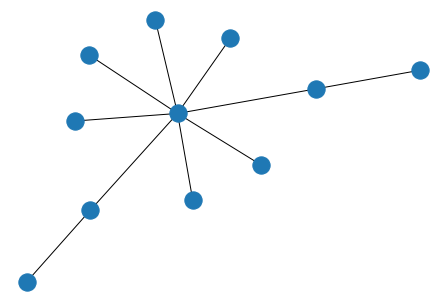

In [55]:
nx.draw(graphs[0])

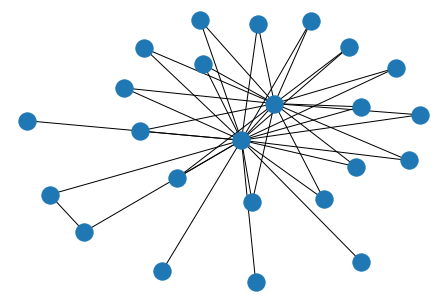

In [54]:
nx.draw(graphs[49])

In [58]:
y[49]

1